In [88]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [89]:
import numpy as np
import pandas as pd


In [90]:
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [91]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func


In [92]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [93]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
Base.classes.keys()


['measurement', 'station']

In [94]:
# We can view all of the classes that automap found
Measurement = Base.classes.measurement


In [95]:
# Save references to each table
Station = Base.classes.station


In [96]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

In [97]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [98]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])
    

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [99]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])
    

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [100]:
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [101]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [102]:
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23')

In [103]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)


Query Date:  2016-08-23


In [104]:
# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
            filter(Measurement.date > query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column


df = pd.DataFrame(results, columns=['measurement_id', 'measurement_station', 'measurement_date', 'measurement_prcp', 'measurement_tobs'])
df.set_index('measurement_date', inplace=True)
df.head()


,measurement_id,measurement_station,measurement_prcp,measurement_tobs
measurement_date,,,,
2016-08-24,2365,USC00519397,0.08,79.0
2016-08-25,2366,USC00519397,0.08,80.0
2016-08-26,2367,USC00519397,0.00,79.0
2016-08-27,2368,USC00519397,0.00,77.0
2016-08-28,2369,USC00519397,0.01,78.0


In [105]:
# Sort the dataframe by date

df = df.sort_index().dropna()
df = df.rename (columns = {
    "measurement_station" : "station",
    "measurement_prcp" : "precipitation",
    "measurement_tobs" : "tobs"
    })
df.head()


,measurement_id,station,precipitation,tobs
measurement_date,,,,
2016-08-24,2365,USC00519397,0.08,79.0
2016-08-24,14609,USC00519281,2.15,77.0
2016-08-24,7332,USC00514830,2.28,80.0
2016-08-24,5092,USC00513117,2.15,76.0
2016-08-24,19203,USC00516128,1.45,74.0


In [106]:
len(df)


2015

In [107]:
precipitation_df = df[['precipitation']]
precipitation_df.head()


,precipitation
measurement_date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45


Text(0, 0.5, 'Inches')

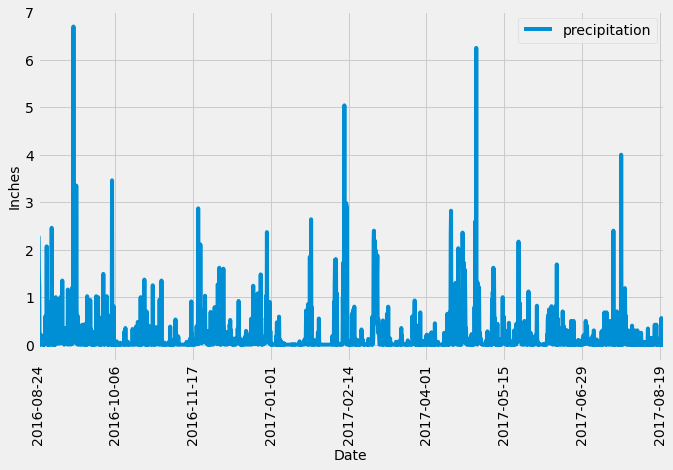

In [109]:
precipitation_df.plot(rot=90, figsize=(10,6))
plt.xlabel("Date", fontsize=14)
plt.ylabel("Inches", fontsize=14)


In [110]:
precipitation_df.describe()


,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [111]:
# Design a query to show how many stations are available in this dataset?
station_num = session.query(Station.station).count()
station_num 


9

In [112]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_station


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [113]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
first_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station=='USC00519281').all()
first_station


[(54.0, 85.0, 71.66378066378067)]

In [114]:
# Choose the station with the highest number of temperature observations.
active_station[0]


('USC00519281', 2772)

In [115]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
first_station_T = session.query(Measurement.tobs).\
        filter(Measurement.station=='USC00519281').\
        filter(Measurement.date > query_date).all()
#first_station_T


In [116]:
Station_T_df = pd.DataFrame(first_station_T)
Station_T_df.head()


,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0


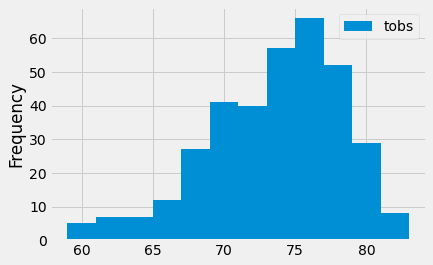

In [117]:
Station_T_df.plot.hist(bins=12)


In [118]:
results = session.query(Measurement.date, Measurement.prcp).all()
results[5][0]

'2010-01-07'

In [119]:
dates = session.query(Measurement.date).all()
list_dates = list(np.ravel(dates))

input_d = input("input start_date: ")

for date in list_dates:
    if date==input_d:
        query_date = date
        print("found it!", query_date)

results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
        filter(Measurement.date >= query_date).all()
start_date_query = list(np.ravel(results))
start_date_query

input start_date: 2015-05-05
found it! 2015-05-05
found it! 2015-05-05
found it! 2015-05-05
found it! 2015-05-05
found it! 2015-05-05
found it! 2015-05-05
found it! 2015-05-05


[56.0, 87.0, 74.6829360575104]

In [120]:
dtt = {}
for result in results:    
    dtt[result[0]] = result[1]
#dtt
    

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")


In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
